In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random



In [3]:
dataset_path = 'dataset'
categories = ['first_print', 'second_print']


In [4]:
for c in categories:
    path = os.path.join(dataset_path, c)
    print(f"Category: {c}, Number of images: {len(os.listdir(path))}")

Category: first_print, Number of images: 100
Category: second_print, Number of images: 100


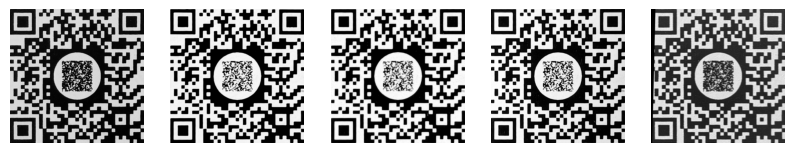

In [5]:
def show_images(cat, num=5):
    path = os.path.join(dataset_path,cat)
    images = os.listdir(path)[:num]
    
    plt.figure(figsize=(10,5))
    for i,img_name in enumerate(images):
        img = cv2.imread(os.path.join(path,img_name),cv2.IMREAD_GRAYSCALE)
        plt.subplot(1,num,i+1)
        plt.imshow(img,cmap='gray')
        plt.axis('off')
    plt.show()
    
show_images("first_print")

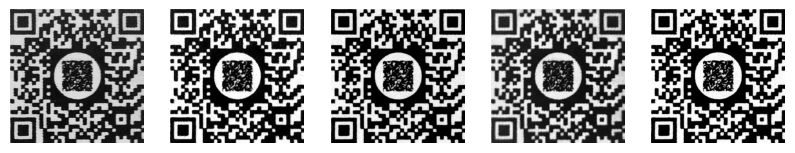

In [6]:
show_images("second_print")

In [7]:
def load_images(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return img

first_img_print = load_images(os.path.join(dataset_path, "first_print", os.listdir(os.path.join(dataset_path, "first_print"))[0]))
second_img_print = load_images(os.path.join(dataset_path, "second_print", os.listdir(os.path.join(dataset_path, "second_print"))[0]))


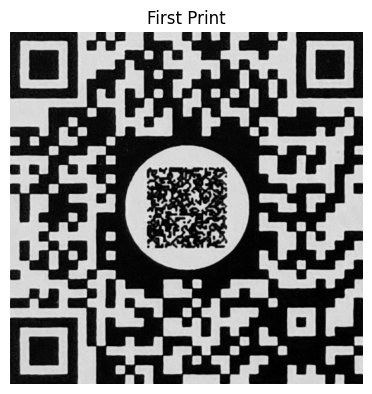

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(first_img_print, cmap='gray')
plt.title("First Print")
plt.axis('off')

plt.show()

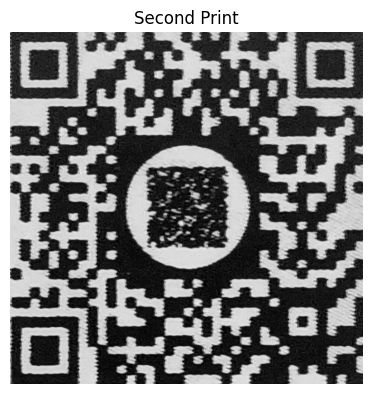

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(second_img_print, cmap='gray')
plt.title("Second Print")
plt.axis('off')

plt.show()

In [10]:
print("First Print Image Shape:", first_img_print.shape)
print("Second Print Image Shape:", second_img_print.shape)


First Print Image Shape: (815, 815)
Second Print Image Shape: (765, 765)


as we have a size mismatch we ll need to resize the images

In [ ]:
# determine smallest common dimensions and set that to all

target_shape = (min(first_img_print.shape[1], second_img_print.shape[1]),
               min(first_img_print.shape[0], second_img_print.shape[0]))

first_image_resized = cv2.resize(first_img_print, target_shape)
second_image_resized = cv2.resize(second_img_print, target_shape)


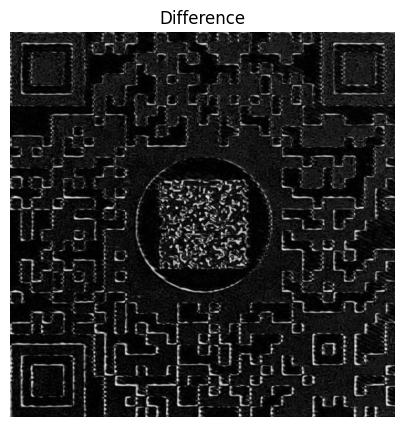

In [12]:
diff = cv2.absdiff(first_image_resized, second_image_resized)

plt.figure(figsize=(5,5))
plt.imshow(diff, cmap='gray')
plt.title("Difference")
plt.axis('off')

plt.show()

In [13]:
print("First Print Image Shape:", first_image_resized.shape)
print("Second Print Image Shape:", second_image_resized.shape)

First Print Image Shape: (765, 765)
Second Print Image Shape: (765, 765)


histogram: pixel intensity distribution


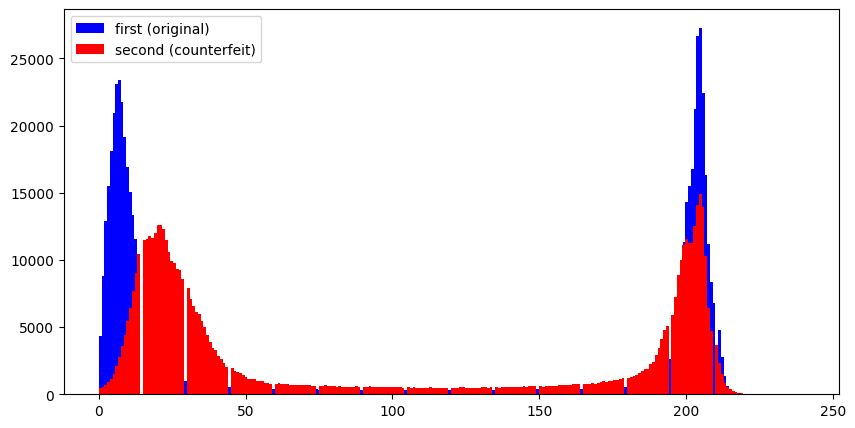

In [14]:
plt.figure(figsize=(10,5))
plt.hist(first_image_resized.ravel(), bins=256, color='blue', alpha=1, label='first (original)')
plt.hist(second_image_resized.ravel(), bins=256, color='red', alpha=1, label='second (counterfeit)')
plt.legend()
plt.show()

compute sharpness of both images

In [15]:
def compute_sharpness(img):
    return cv2.Laplacian(img, cv2.CV_64F).var()


In [16]:
print("First Print Sharpness:", compute_sharpness(first_image_resized))
print("Second Print Sharpness:", compute_sharpness(second_image_resized))


First Print Sharpness: 327.2210426407876
Second Print Sharpness: 262.12360080095215


In [17]:
def convertToGreyScale(img):
    if len(img.shape) == 3:
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

In [18]:
def get_random_original_image(path):
    image_files = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    if not image_files:
        raise ValueError("No imgs found first.")
    
    random_image = random.choice(image_files)  
    image_path = os.path.join(path, random_image)
    
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 



In [19]:
def get_random_second_image(path):
    image_files = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    if not image_files:
        raise ValueError("No imgs found second.")
    
    random_image = random.choice(image_files)
    image_path = os.path.join(path, random_image)
    
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)



In [20]:
def resize_image(img, target_shape=(765, 765)):
    return cv2.resize(img, target_shape)

In [21]:
first_image = get_random_original_image(os.path.join(dataset_path, "first_print"))
second_image = get_random_second_image(os.path.join(dataset_path, "second_print"))

In [22]:
first_image = convertToGreyScale(first_image)
second_image = convertToGreyScale(second_image)

In [23]:
first_image = resize_image(first_image)
second_image = resize_image(second_image)

In [24]:
first_image.shape

(765, 765)

In [25]:
second_image.shape

(765, 765)

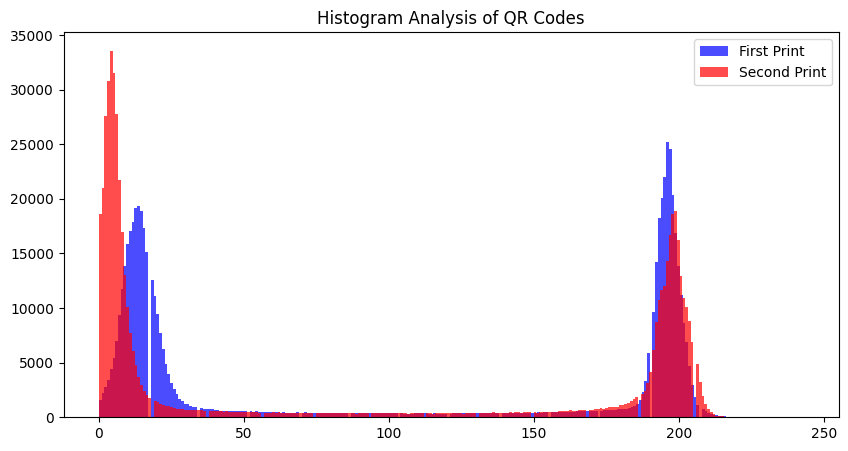

In [26]:
plt.figure(figsize=(10,5))
plt.hist(first_image.ravel(), bins=256, color='blue', alpha=0.7, label='First Print')
plt.hist(second_image.ravel(), bins=256, color='red', alpha=0.7, label='Second Print')
plt.legend()
plt.title("Histogram Analysis of QR Codes")
plt.show()


sobel edge detection

In [27]:
def sobel_edge_detection(img):
    sX = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5) #x dirsction
    sY = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5) #y direction 
    sobelCombined = cv2.magnitude(sX,sY)
    return sobelCombined

In [28]:
first_sobel = sobel_edge_detection(first_image)
second_sobel = sobel_edge_detection(second_image)  

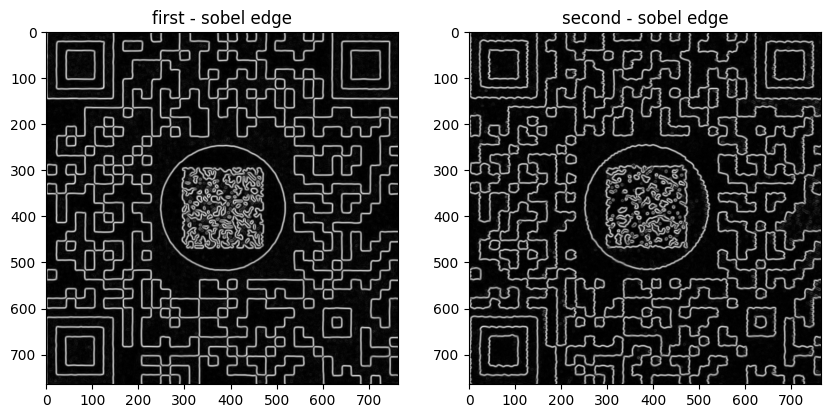

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(first_sobel, cmap="gray")
plt.title("first - sobel edge")

plt.subplot(1, 2, 2)
plt.imshow(second_sobel, cmap="gray")
plt.title("second - sobel edge")

plt.show()


In [30]:
def canny_edge_detection(image):
    return cv2.Canny(image, 50, 150)

first_canny = canny_edge_detection(first_image)
second_canny = canny_edge_detection(second_image)



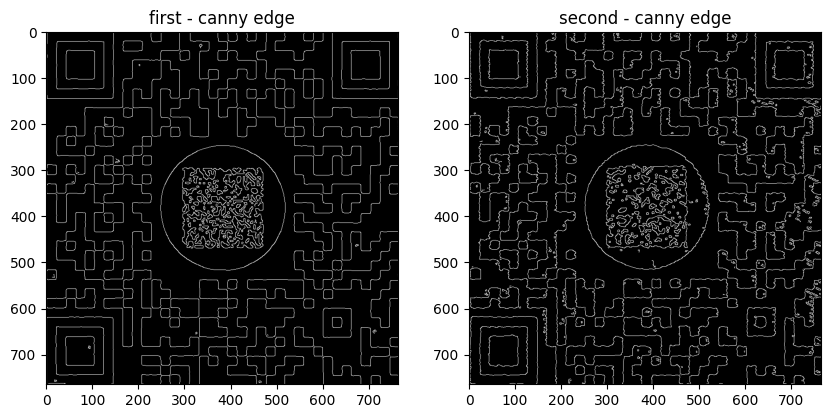

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(first_canny, cmap="gray")
plt.title("first - canny edge")

plt.subplot(1, 2, 2)
plt.imshow(second_canny, cmap="gray")
plt.title("second - canny edge")

plt.show()


texture analysis using LBP local binary patterns

In [32]:
import sys
!{sys.executable} -m pip install scikit-image



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from skimage.feature import local_binary_pattern


In [34]:
def compute_lbp(image, radius=3, points=8):
    return local_binary_pattern(image, points, radius, method="uniform")

first_lbp = compute_lbp(first_image)

In [35]:
seconf_lbp = compute_lbp(second_image)    

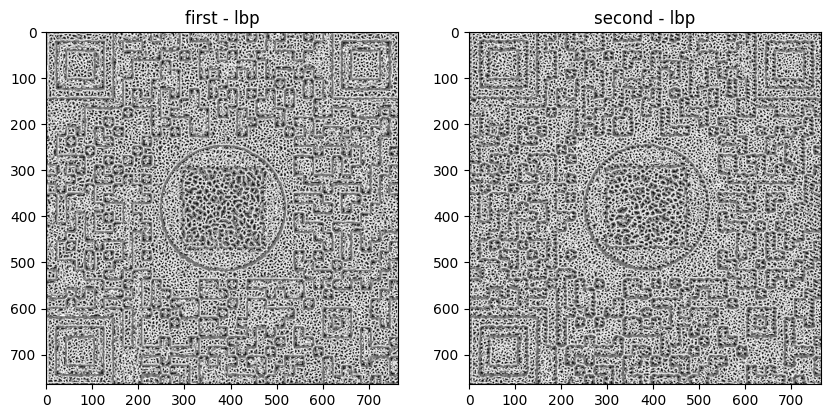

In [36]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(first_lbp, cmap="gray")
plt.title("first - lbp")

plt.subplot(1, 2, 2)
plt.imshow(seconf_lbp, cmap="gray")
plt.title("second - lbp")

plt.show()

image stats pixel intensity, contrast, sharpness

In [37]:
def extract_statistics(image):
    mean_intensity = np.mean(image)
    contrast = np.std(image)  
    sharpness = compute_sharpness(image)

    return mean_intensity, contrast, sharpness


stats_first = extract_statistics(first_image)
stats_second = extract_statistics(second_image)

print(f"First Print Stats - Mean: {stats_first[0]:.2f}, Contrast: {stats_first[1]:.2f}, Sharpness: {stats_first[2]:.2f}")
print(f"Second Print Stats - Mean: {stats_second[0]:.2f}, Contrast: {stats_second[1]:.2f}, Sharpness: {stats_second[2]:.2f}")


First Print Stats - Mean: 100.53, Contrast: 87.20, Sharpness: 267.58
Second Print Stats - Mean: 89.95, Contrast: 90.60, Sharpness: 308.73


In [38]:
def compute_fft(image):
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)  # Shift zero frequency to center
    magnitude_spectrum = 20 * np.log(np.abs(f_shift))  # Compute log magnitude spectrum
    return magnitude_spectrum

first_fft = compute_fft(first_image)
second_fft = compute_fft(second_image)



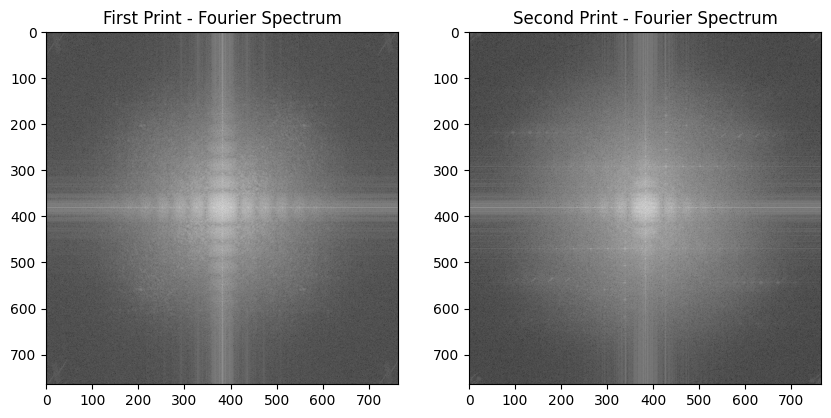

In [39]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(first_fft, cmap="gray")
plt.title("First Print - Fourier Spectrum")

plt.subplot(1, 2, 2)
plt.imshow(second_fft, cmap="gray")
plt.title("Second Print - Fourier Spectrum")

plt.show()


Histogram of gradient! - this captures shape and textures

In [40]:
from skimage.feature import hog

def extract_hog_features(image):
    """Extract HOG features from an image."""
    hog_features, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return hog_features


In [41]:
first_hog = extract_hog_features(first_image)
second_hog = extract_hog_features(second_image)


In [70]:
print(f"Hog features first and second print: \n {first_hog[:5]} \n \n {second_hog[:5]}")

Hog features first and second print: 
 [0.41959893 0.2311845  0.24746429 0.29072548 0.29735251] 
 
 [0.37667054 0.36663528 0.24959675 0.13246689 0.02386256]


wavlet features -(helps in detecting patterns and textures)


In [43]:
%pip install PyWavelets


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import pywt 
def extract_wavelet_features(image):
    coeffs  = pywt.wavedec(image, 'haar',level=2)
    features = np.concatenate([c.ravel() for c in coeffs])
    return features[:100] # sliced to take oinly first 100 features

first_wavelet = extract_wavelet_features(first_image)
second_wavelet = extract_wavelet_features(second_image)
print("Wavelet features first and second print")
print(first_wavelet[:5])
print(second_wavelet[:5])

Wavelet features first and second print
[388.  353.5 356.5 358.5 336.5]
[376.  143.   33.   58.5  90.5]


ORb: Oriented FAST and Rotated BRIEF 

In [45]:

def extract_orb_features(image, max_features=100):
    """Extract ORB keypoints and descriptors."""
    orb = cv2.ORB_create(nfeatures=max_features)  # Create ORB detector
    keypoints, descriptors = orb.detectAndCompute(image, None)  # Detect keypoints & descriptors
    
    if descriptors is None:
        return np.zeros((max_features, 32))  # If no descriptors, return zero vector
    return descriptors.flatten()[:max_features * 32]  # Flatten descriptor array


In [46]:
first_orb = extract_orb_features(first_image)
second_orb = extract_orb_features(second_image)

In [47]:
print(f"ORB features \n\n{first_orb[:10]} \n\n{second_orb[:10]}")

ORB features 

[117  36  72  40  25 182 208  74 114 129] 

[148 185  27 113  82 207 115 113  50 168]


In [72]:
from skimage.feature import local_binary_pattern
import numpy as np

def extract_lbp_features(image, radius=3, points=8):
    """Extract LBP features from an image."""
    lbp = local_binary_pattern(image, points, radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, points + 3), density=True)
    return hist  # LBP histogram as feature vector

first_lbp = extract_lbp_features(first_image)
seconf_lbp = extract_lbp_features(second_image)


In [73]:
print(f"LBP features \n\n{first_lbp[:5]} \n\n{seconf_lbp[:5]}")

LBP features 

[0.05991371 0.09311974 0.04771498 0.07006194 0.13787005] 

[0.06925029 0.08573284 0.05615789 0.08136529 0.1213875 ]


In [49]:
import cv2

def extract_edge_density(image):
    """Extract edge density using Canny edge detection."""
    edges = cv2.Canny(image, 50, 150)
    edge_density = np.sum(edges) / (image.shape[0] * image.shape[1])  # Edge pixel ratio
    return edge_density


from the above methods we will select
1) LBP
2) Canny Edge
3) Wavelet Transform (frequency based on fetaures)
4) HOG ()
5) ORB

we will create a dataset combining all this features and train a model


In [50]:
import pandas as pd


In [51]:
def create_features_dataset(folder_path, label):
    feature_list = []
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    for image_name in image_files:
        image_path = os.path.join(folder_path,image_name)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        
        
        # extract all features
        lbp_features = extract_lbp_features(image)
        canny_features = extract_edge_density(image)
        wavelet_features = extract_wavelet_features(image)
        hog_features  = extract_hog_features(image)
        orb_features = extract_orb_features(image)
        
        
        combined_features = np.hstack((lbp_features , canny_features, wavelet_features, hog_features, orb_features))
        feature_list.append(combined_features)
        
        
    return pd.DataFrame(feature_list), [label] * len(image_files)


In [52]:
x_first, y_first = create_features_dataset(  os.path.join(dataset_path, "first_print") , label=0 )

In [53]:
x_second, y_second = create_features_dataset(  os.path.join(dataset_path, "second_print"), label=1  )

In [54]:
X = pd.concat([x_first,x_second] , axis = 0).reset_index(drop=True)
Y = np.array(y_first + y_second)


In [55]:
print("feature dataset shape: ", X.shape)

feature dataset shape:  (200, 521711)


In [56]:
%pip install scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
# # Train Random Forest
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)



In [60]:
# # Train XGBoost
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
# xgb_model.fit(X_train, y_train)
# xgb_model.save_model("xgboost_model.json")



In [ ]:
from xgboost import XGBClassifier

# Load the trained model
xgb_loaded = XGBClassifier()
xgb_loaded.load_model(r"C:\Users\jaysu\Desktop\qr_code_ml\saved_models\xgboost_model.json")

# Make predictions
y_pred = xgb_loaded.predict(X_test)
print("Loaded model accuracy:", accuracy_score(y_test, y_pred))


Loaded model accuracy: 0.85


In [62]:
# rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_loaded.predict(X_test)


In [63]:
def evaluate_model(y_true, y_pred, model_name):
    """Print evaluation metrics for a given model."""
    print(f"\n🔹 {model_name} Performance")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate models
evaluate_model(y_test, xgb_preds, "XGBoost")




🔹 XGBoost Performance
Accuracy: 0.85
Confusion Matrix:
 [[17  4]
 [ 2 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.81      0.89      0.85        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



xgboost with 85% acc. 
applying cross validations for better acc.

In [64]:
evaluate_model(y_test, xgb_preds, "XGBoost")



🔹 XGBoost Performance
Accuracy: 0.85
Confusion Matrix:
 [[17  4]
 [ 2 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.81      0.89      0.85        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



In [65]:
import joblib


In [66]:
# from sklearn.model_selection import cross_val_score

# # Perform 5-Fold Cross-Validation
# cv_scores = cross_val_score(xgb_model, X, Y, cv=5, scoring='accuracy')

# joblib.dump(cv_scores, "cv_scores.pkl")

# print("Cross-validation scores saved!")



In [74]:
cv_scores = joblib.load(r"C:\Users\jaysu\Desktop\qr_code_ml\saved_models\cv_scores.pkl")


In [68]:
print("Loaded Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Loaded Cross-Validation Scores: [0.775 0.95  0.9   0.925 0.875]
Mean Accuracy: 0.885


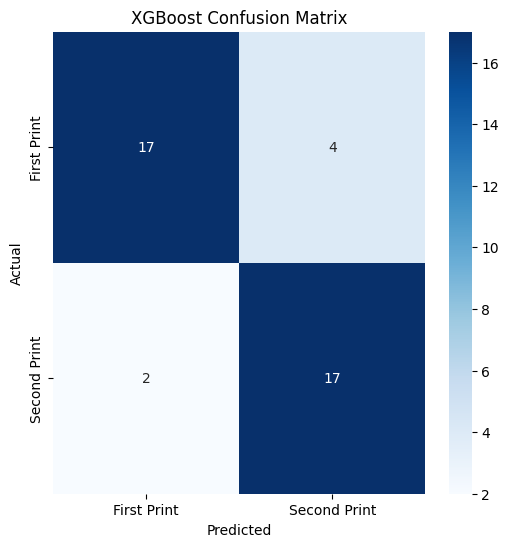

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        21
           1       0.81      0.89      0.85        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



In [69]:
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["First Print", "Second Print"], yticklabels=["First Print", "Second Print"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Classification Report
print("🔹 Classification Report:\n", classification_report(y_test, y_pred))
